In [2]:
import cv2
import os
import matplotlib.pyplot as plt

In [3]:
def show_image(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [4]:
def process_image(image_resized, car_cascade):
    cars = car_cascade.detectMultiScale(image_resized, minNeighbors=3)
    roi = None
    if len(cars) > 0:
        (x, y, w, h) = cars[0]
        cv2.rectangle(image_resized, (x, y), (x + w, y + h), (255, 0, 0), 2)
        roi = image_resized[y:y + h, x:x + w]
    return image_resized, roi

# Deteksi single objek

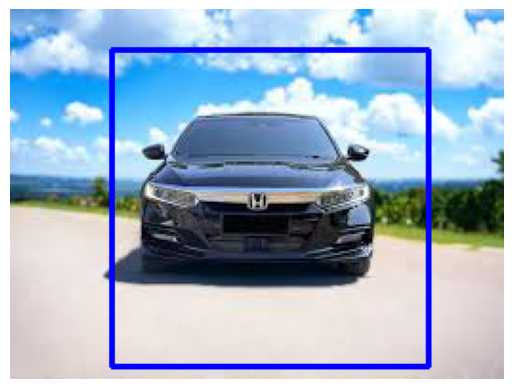

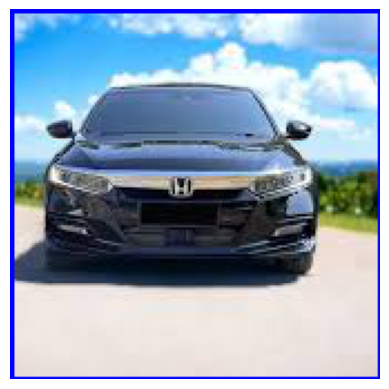

In [6]:
car_cascade = cv2.CascadeClassifier('data/cars.xml') #haarcascade fitur mobil

image = cv2.imread('mobil.jpg')

processed_image, roi = process_image(image, car_cascade)

show_image(processed_image)
show_image(roi) if roi is not None else None


# multiple objek

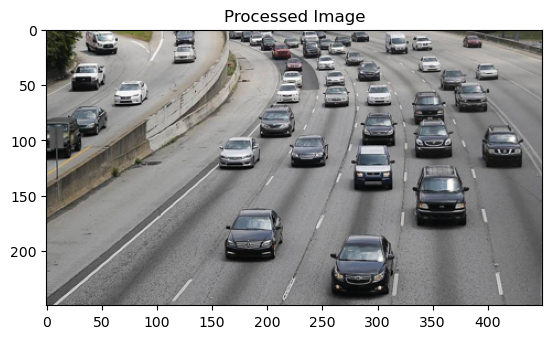

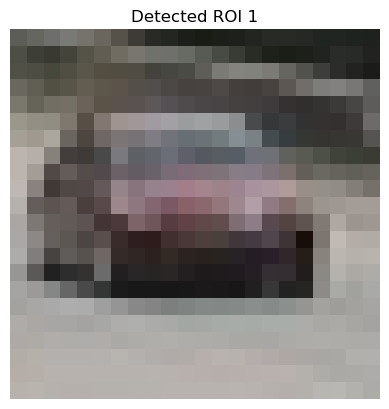

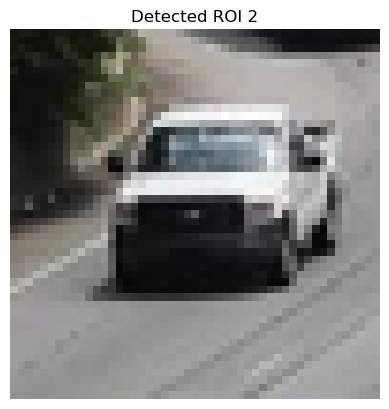

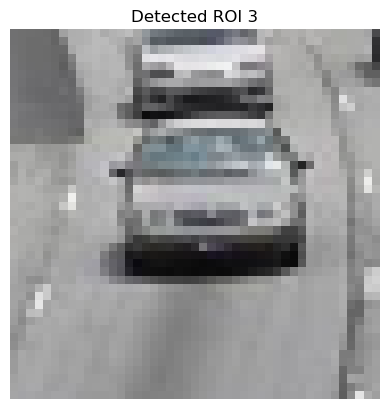

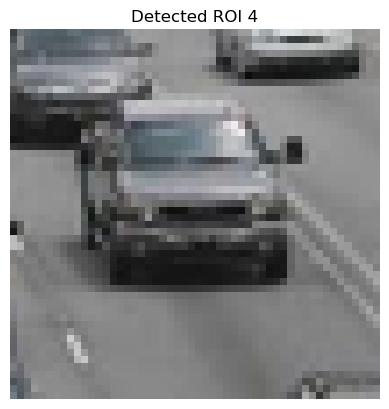

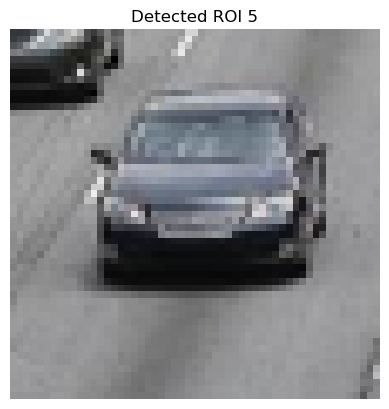

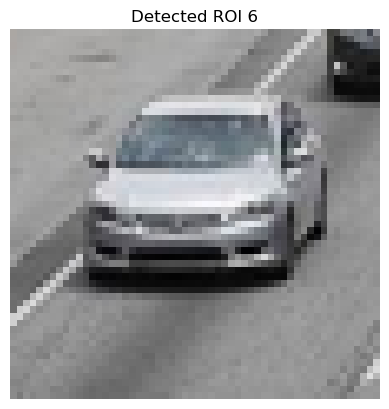

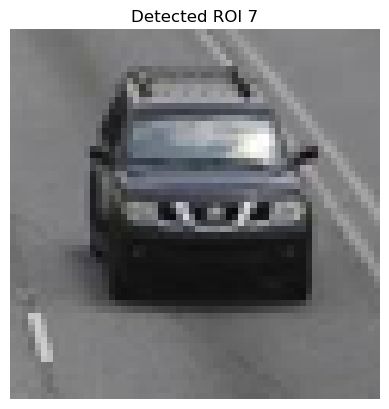

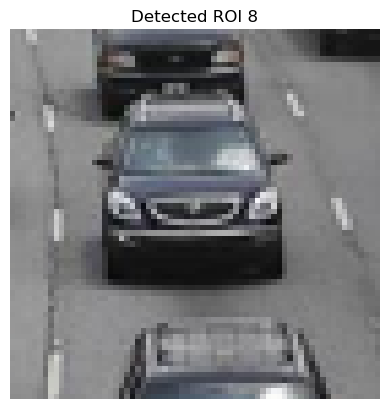

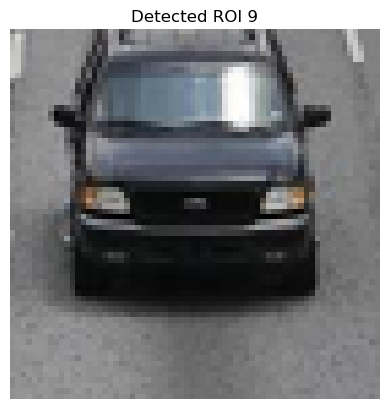

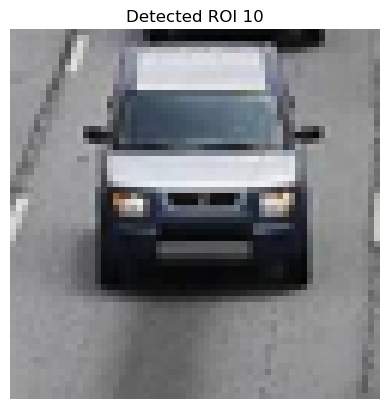

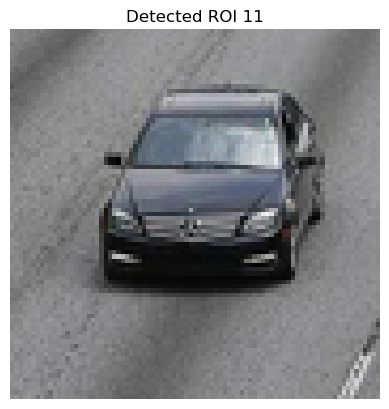

In [ ]:
car_cascade = cv2.CascadeClassifier('cars.xml') #haarcascade fitur mobil
# Load the trained model
# model = ... # Load your trained model here
roi = []

# Function to process an image
def deteksi_image(image_resized):

    # Detect cars in the image
    cars = car_cascade.detectMultiScale(image_resized, minNeighbors=5)
    roi = None
    roi_list = []
    for (x, y, w, h) in cars:
        # Draw rectangle around detected car
#         cv2.rectangle(image_resized, (x, y), (x + w, y + h), (255, 0, 0), 1)

        # Extract the region of interest (ROI)
        roi = image_resized[y:y + h, x:x + w]
        roi_list.append(roi)


    return image_resized ,roi_list

# Load an example image
image = cv2.imread('mobils.png')

# Process the image
processed_image , roi = deteksi_image(image)

# Convert BGR image to RGB for displaying with matplotlib
processed_image_rgb = cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB)

# Display the processed image using matplotlib
plt.imshow(processed_image_rgb)
plt.title("Processed Image")
# plt.axis('off') # Hide axes
plt.show()


# If ROI is detected, display the ROI as well
if roi is not None:
    no=1
    for lists in roi:
        roi_rgb = cv2.cvtColor(lists, cv2.COLOR_BGR2RGB)
        plt.imshow(roi_rgb)
        plt.title(f"Detected ROI {no}")
        plt.axis('off') # Hide axes
        plt.show()
        no=no+1

# Recognisi

Prediksi: van - probabilitas: 0.8259919988454526


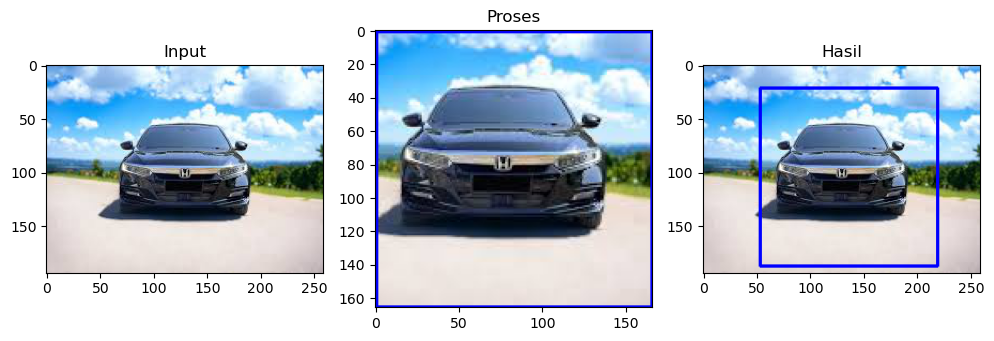

In [ ]:
import cv2
import matplotlib.pyplot as plt
import pickle
import os
import numpy as np

def read_model(filename, path=""):
    with open(os.path.join(path, filename), 'rb') as in_name:
        model = pickle.load(in_name)
        return model


# Load the car cascade
car_cascade = cv2.CascadeClassifier('cars.xml')

# Load the trained model
model = read_model("model.pkl", path="") #load model


# Function to process an image
def deteksi_image(image_resized):
    # Resize the image to match the trainer's input dimensions
    height, width = 16, 16
#     image_resized = cv2.resize(image, (height, width), interpolation=cv2.INTER_AREA)

    # Detect cars in the image
    cars = car_cascade.detectMultiScale(image_resized, minNeighbors=3)

    for (x, y, w, h) in cars:
        # Draw rectangle around detected car
        cv2.rectangle(image_resized, (x, y), (x + w, y + h), (255, 0, 0), 2)

        # Extract the region of interest (ROI)
        roi = image_resized[y:y + h, x:x + w]


        # Resize the blurred ROI
        muka_resized = cv2.resize(roi, (16, 16), interpolation=cv2.INTER_AREA)

        # Flatten the resized ROI
        l = [muka_resized.flatten()/255]

        # Predict using the trained model
        id_ = int(model.predict(l)[0])

        # Lakukan prediksi probabilitas untuk setiap kelas
        prediksi_probabilitas = model.predict_proba(l)

        # Determine the result based on the prediction
        if id_ == 0:
            has = 'citycar'
        elif id_ == 1:
            has = 'sedan'
        elif id_ == 2:
            has = 'sport'
        else:
            has = 'van'

        print(f"Prediksi: {has} - probabilitas: {np.max(prediksi_probabilitas)}")

        # Annotate the image with the detection result
#         cv2.putText(image_resized, "Deteksi: " + has, (20, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

    return image_resized , roi



# Load an example image
image = cv2.imread('mobil.jpg')

# Buat figure
plt.figure(figsize=(10, 5))

# Subplot pertama: Menampilkan gambar pertama
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Input')


# Process the image
processed_image , roi = deteksi_image(image)




# Subplot kedua: Menampilkan gambar kedua
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
plt.title('Proses')


# Subplot kedua: Menampilkan gambar ketiga
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
plt.title('Hasil')

# Menampilkan plot
plt.tight_layout()
plt.show()